In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.io.wavfile import write

# Sound Preprocessing & Sample Generating

Object-oriented sample collection:

In [4]:
class Sample:
    
# Initializes Sample object using filename, containing "audio" attribute for audio array and "sr" attribute for sample rate.
# Arguments: "filename" = audio file.
    
    def __init__(self, filename):
        self.filename = filename
        self.audio, self.sr = librosa.load(file)
        
# Play audio file:
# Argument: None.
        
    def play_audio(self):
        display(ipd.Audio(self.filename))
        
# Visualize audio file. 
# Argument: "x" and "y" = provide the size of the visualization (x = 18 and y = 8 are good values to use), 
#           "amplitude" = lets user graphically test an amplitude above which peaks should be found.

    def visualize(self, x, y, amplitude):
        plt.figure(figsize = (x,y))
        librosa.display.waveplot(self.audio)
        plt.axhline(amplitude, color = "orange", linestyle = "--")
        
# Visualize a segment of time in the audio file. 
# Arguments: "x" and "y" = provide the size of the visualization,
#            "end" = time at which segment should end (in seconds).
#            "start" = time at which segment should start (in secons). If ommited, 0 seconds is assumed.

    def visualize_segment(self, x, y, end, start = 0): 
        plt.figure(figsize = (x,y))
        start_seconds = start*self.sr
        end_seconds = end*self.sr
        librosa.display.waveplot(self.audio[start_seconds:end_seconds])

# Get peaks from audio file. Self.peaks contains the peak indeces and self.num_peaks the number of peaks.
# Arguments: "amplitude" = amplitude criterion for peaks to be extracted,
#            "distance" = minimum distance between peaks in seconds.
        
    def get_peaks(self, amplitude, distance = 1):        
        self.peaks, _ = find_peaks(self.audio, height = amplitude, distance = distance*self.sr)
        self.num_peaks = len(self.peaks)
        print("The audio file has " + str(self.num_peaks) + " peaks.")
        
# Uses peaks to extract the "events" (ie. impacts). Stores events in self.events.
# Arguments: "size" = time duration of event in seconds.
#            "size_be" = time before event in seconds.

    def get_events(self, size, size_be):
        
        if size < size_be:
            print("Size before event cannot be greater than the total size!")
        else:
            size = int(size*self.sr)
            size_be = int(size_be*self.sr)

            events = np.zeros((self.num_peaks, size))

            ''' Fill each row of "impacts" with an array of data around peak, determined by "size" '''

            for i, peak in enumerate(self.peaks):
                events[i] = np.array(self.audio[peak-size_be:peak+size-size_be]) 

            self.events = events
            print("The following is the first event:\n")
            display(ipd.Audio(self.events[0], rate = self.sr))
    
# Plots events for visualization. 
# Arguments: "event_num" = Number of event to be plotted. If ommited, all events are plotted. Must be within valid range.
    
    def visualize_events(self, event_num = "all"):
        if event_num == "all":
            plt.figure(figsize = (16,10))
            for event in self.events:
                librosa.display.waveplot(event)
        elif event_num < 1:
            print("Please provide a valid event number (from 1 to the number of peaks).")
        elif event_num > self.num_peaks:
            print("Event number is greater than the number of events available.")
        else:
            plt.figure(figsize = (16,10))
            librosa.display.waveplot(self.events[event_num - 1])
        
# Uses peaks to extract the "events" (ie. impacts). Stores events in self.events.
# Arguments: "user_label" = label for files per our data labeling convention.
#            "event_class" = use "BF" for ball floor impacts and BR for ball racket impacts.

    def generate_files(self, event_class, user_label):
        for n, event in enumerate(self.events):
            if n >= 99: 
                write(f"{event_class}{n+1}{user_label}.wav", self.sr, event.astype(np.float32))
            elif n >= 9: 
                write(f"{event_class}0{n+1}{user_label}.wav", self.sr, event.astype(np.float32))
            else: 
                write(f"{event_class}00{n+1}{user_label}.wav", self.sr, event.astype(np.float32))

^^^ See the functions in the code above to understand their functions and parameters ^^^

## Follow Instructions to Generate Samples

Change "file" variable to name of file for sample:

In [5]:
file = 'ball_floor_tile.wav'
test = Sample(file)

Use to play audio file:

In [6]:
test.play_audio()

Visualize audio file and choose amplitude for peak selection:

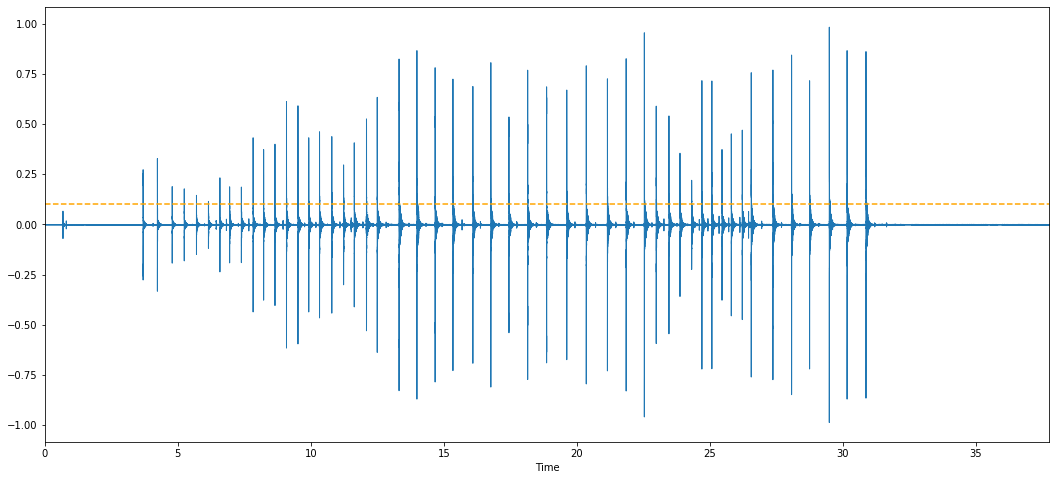

In [15]:
test.visualize(18, 8, 0.10) 

Visualize a smaller segment of audio file:

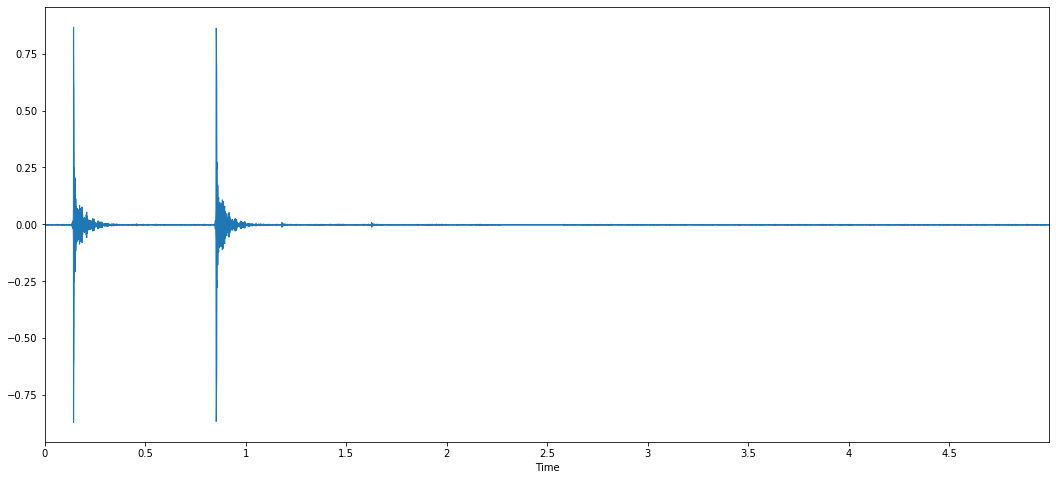

In [16]:
test.visualize_segment(18, 8, end = 35, start = 30)

Obtain peaks by selecting amplitude criterion (make sure to check by counting the peaks yourself):

In [17]:
test.get_peaks(amplitude = 0.10, distance = 0.3)

The audio file has 51 peaks.


Obtain events by selecting the duration of desired samples and the time before event:

In [18]:
test.get_events(0.030, 0.005)

The following is the first event:



Visualize the event(s):

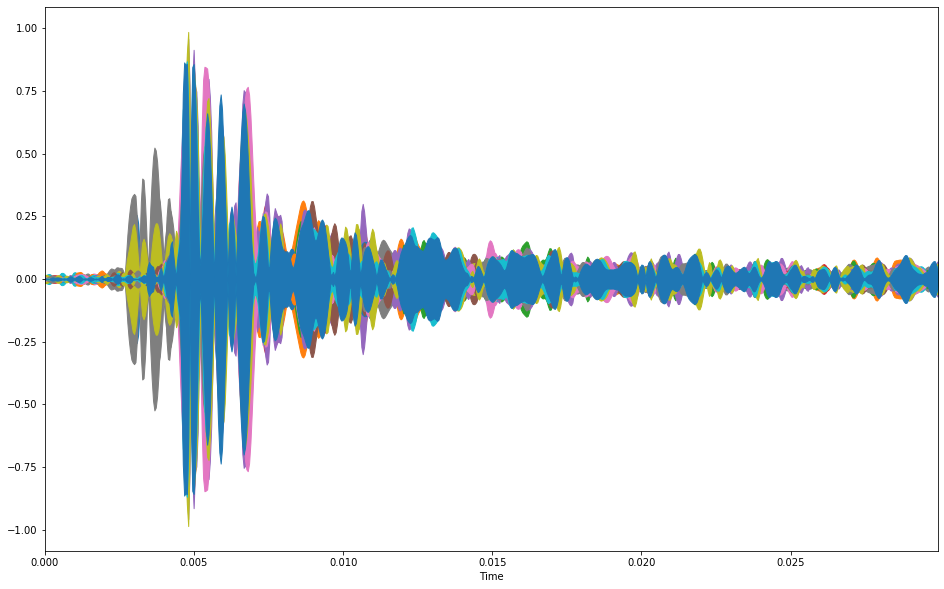

In [19]:
test.visualize_events() #ommit argument to plot all events.

Generate the files by giving them a label following our data labeling convention:

In [24]:
test.generate_files("BG","_user") #BR for ball racket, BG for ball ground.

Change "test_audio" name to check a file to see if it is sounding right!

In [25]:
test_audio = "BG043_user.wav"
ipd.Audio(test_audio)